#Install Library Pytorch-TabNet

In [ ]:
!pip install pytorch-tabnet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
import importlib.metadata
try:
    version = importlib.metadata.version('pytorch-tabnet')
    print(f"PyTorch TabNet version: {version}")
except importlib.metadata.PackageNotFoundError:
    print("PyTorch TabNet is installed, but its version could not be found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

PyTorch TabNet version: 4.1.0


#Load Data

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
# Path to the Excel file in your Google Drive
file_path = '/content/drive/MyDrive/[SEER Part 4] Colorectal Cancer Survival 2018-2022.csv'

# Read the Excel file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    # Rename the specified column
    df.rename(columns={'Age recode with <1 year olds and 90+': 'Age (15-90+)'}, inplace=True)
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!


,Patient ID,Age (15-90+),"Race recode (White, Black, Other)",Sex,Year of diagnosis,Marital status at diagnosis,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Diagnostic Confirmation,...,EOD Regional Nodes Recode (2018+),EOD Mets Recode (2018+),Median household income inflation adj to 2023,Rural-Urban Continuum Code,First malignant primary indicator,Derived EOD 2018 Stage Group Recode (2018+),Grade Pathological (2018+),Grade Clinical (2018+),Tumor Size Summary (2016+),SEER cause-specific death classification
0,1536,45-49 years,"Other (American Indian/AK Native, Asian/Pacifi...",Female,2019,Married (including common law),184,8140,Malignant,Positive histology,...,300,0,"$120,000+",Counties in metropolitan areas ge 1 million pop,No,3B,2,9,27,Alive or dead of other cause
1,3441,75-79 years,White,Male,2021,Single (never married),209,8140,Malignant,Positive histology,...,800,0,"$120,000+",Counties in metropolitan areas ge 1 million pop,No,99,9,1,40,Dead (attributable to this cancer dx)
2,3868,80-84 years,White,Male,2018,Widowed,186,8140,Malignant,Positive histology,...,999,0,"$120,000+",Counties in metropolitan areas ge 1 million pop,No,99,9,1,999,Alive or dead of other cause
3,4111,80-84 years,White,Female,2019,Widowed,187,8140,Malignant,Positive histology,...,0,40,"$120,000+",Counties in metropolitan areas ge 1 million pop,No,4B,9,2,50,Dead (attributable to this cancer dx)
4,5437,60-64 years,White,Female,2018,Divorced,187,8140,Malignant,Positive histology,...,0,0,"$120,000+",Counties in metropolitan areas ge 1 million pop,Yes,1,2,9,22,Alive or dead of other cause


#Data Preprocessing

## Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54485 entries, 0 to 54484
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Patient ID                                       54485 non-null  int64 
 1   Age (15-90+)                                     54485 non-null  object
 2   Race recode (White, Black, Other)                54485 non-null  object
 3   Sex                                              54485 non-null  object
 4   Year of diagnosis                                54485 non-null  int64 
 5   Marital status at diagnosis                      54485 non-null  object
 6   Primary Site                                     54485 non-null  int64 
 7   Histologic Type ICD-O-3                          54485 non-null  int64 
 8   Behavior code ICD-O-3                            54485 non-null  object
 9   Diagnostic Confirmation                

In [ ]:
import numpy as np

# Replace "Blank(s)" with NaN to treat them as missing values
df.replace(["Blank(s)"], np.nan, inplace=True)

# Check for null values and sum them per column
missing_values = df.isnull().sum()

print("Missing values per column (including 'Blank(s)'):")
display(missing_values)

Missing values per column (including 'Blank(s)'):


,0
Patient ID,0
Age (15-90+),0
"Race recode (White, Black, Other)",0
Sex,0
Year of diagnosis,0
Marital status at diagnosis,0
Primary Site,0
Histologic Type ICD-O-3,0
Behavior code ICD-O-3,0
Diagnostic Confirmation,0


##Duplicate Value

In [ ]:
df.duplicated().sum()

np.int64(0)

##Outlier Value

Checking for outliers in integer columns:


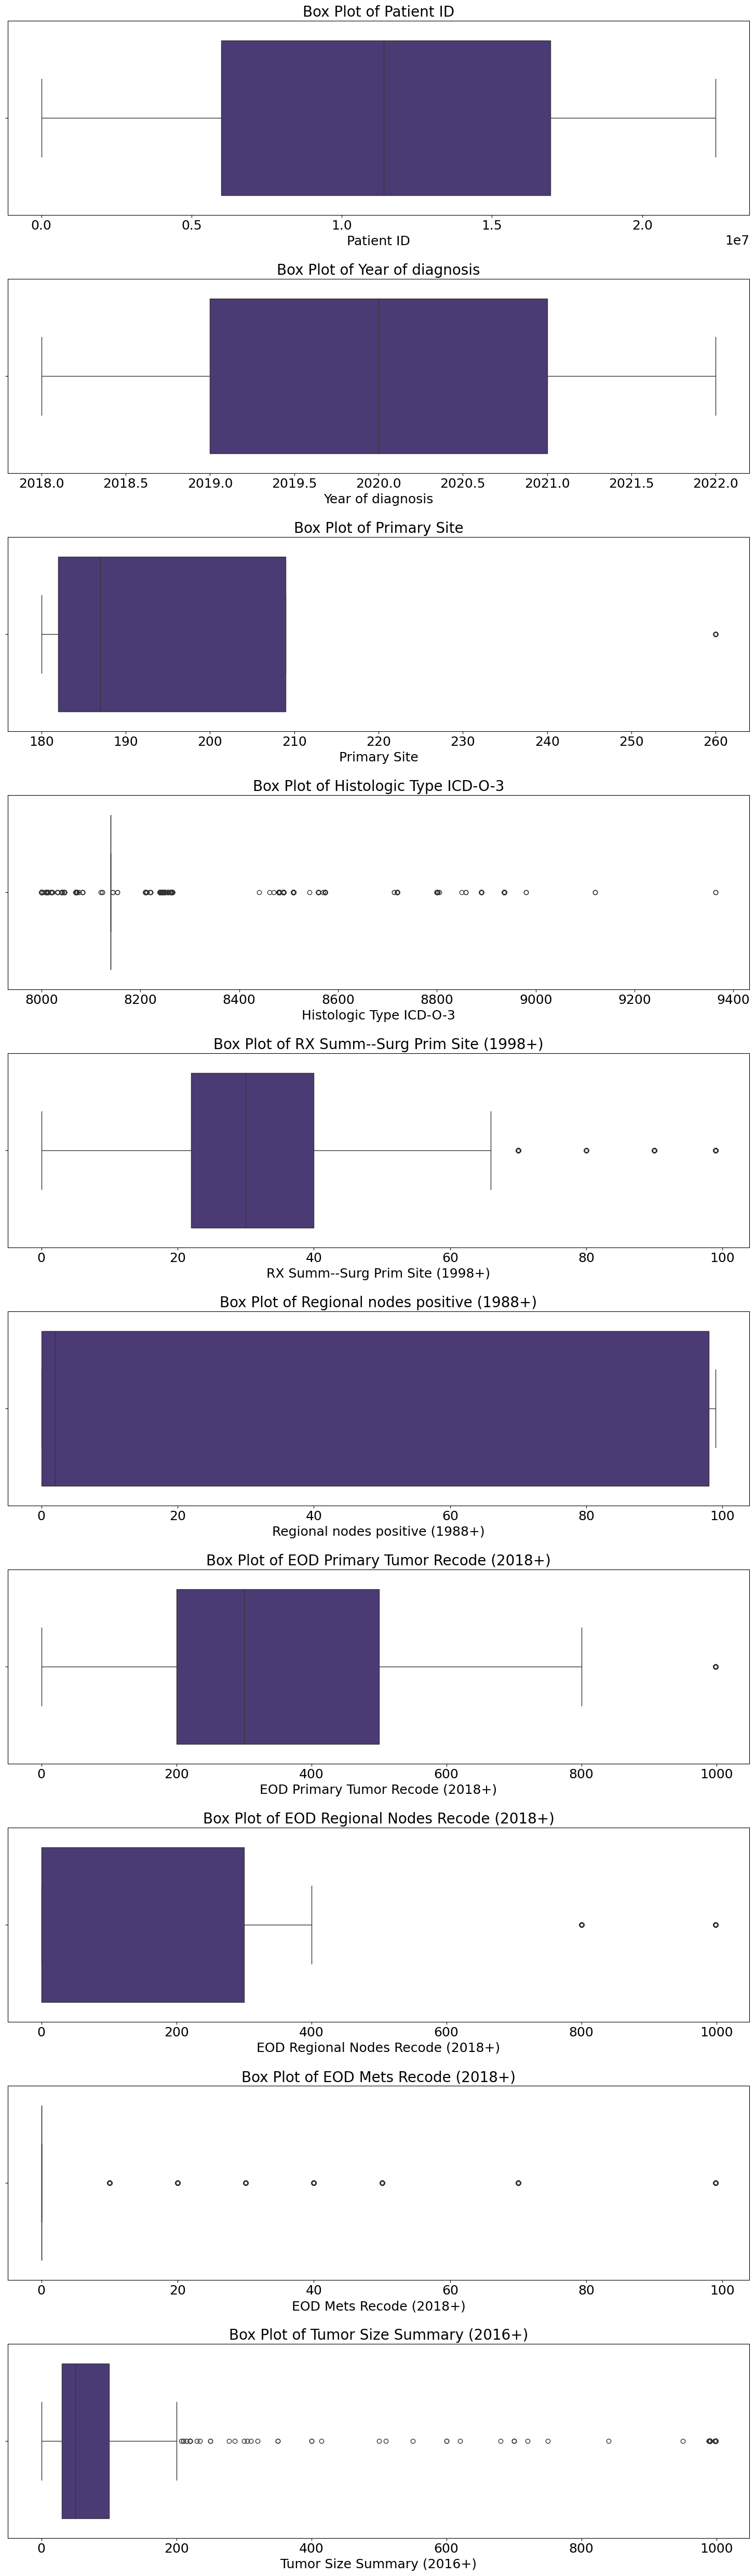

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with integer data type
int_cols = df.select_dtypes(include='int64').columns

print("Checking for outliers in integer columns:")

# Visualize outliers using box plots for integer columns
plt.figure(figsize=(15, 5 * len(int_cols)))
for i, col in enumerate(int_cols):
    plt.subplot(len(int_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Drop non-clinical ID
df = df.drop(columns=['Patient ID'])

# Filter valid colorectal site
df = df[(df['Primary Site'] >= 180) & (df['Primary Site'] <= 209)]

# Filter valid histologic type (epithelial CRC)
df = df[(df['Histologic Type ICD-O-3'] >= 8000) & (df['Histologic Type ICD-O-3'] <= 9000)]

Checking for outliers in integer columns:


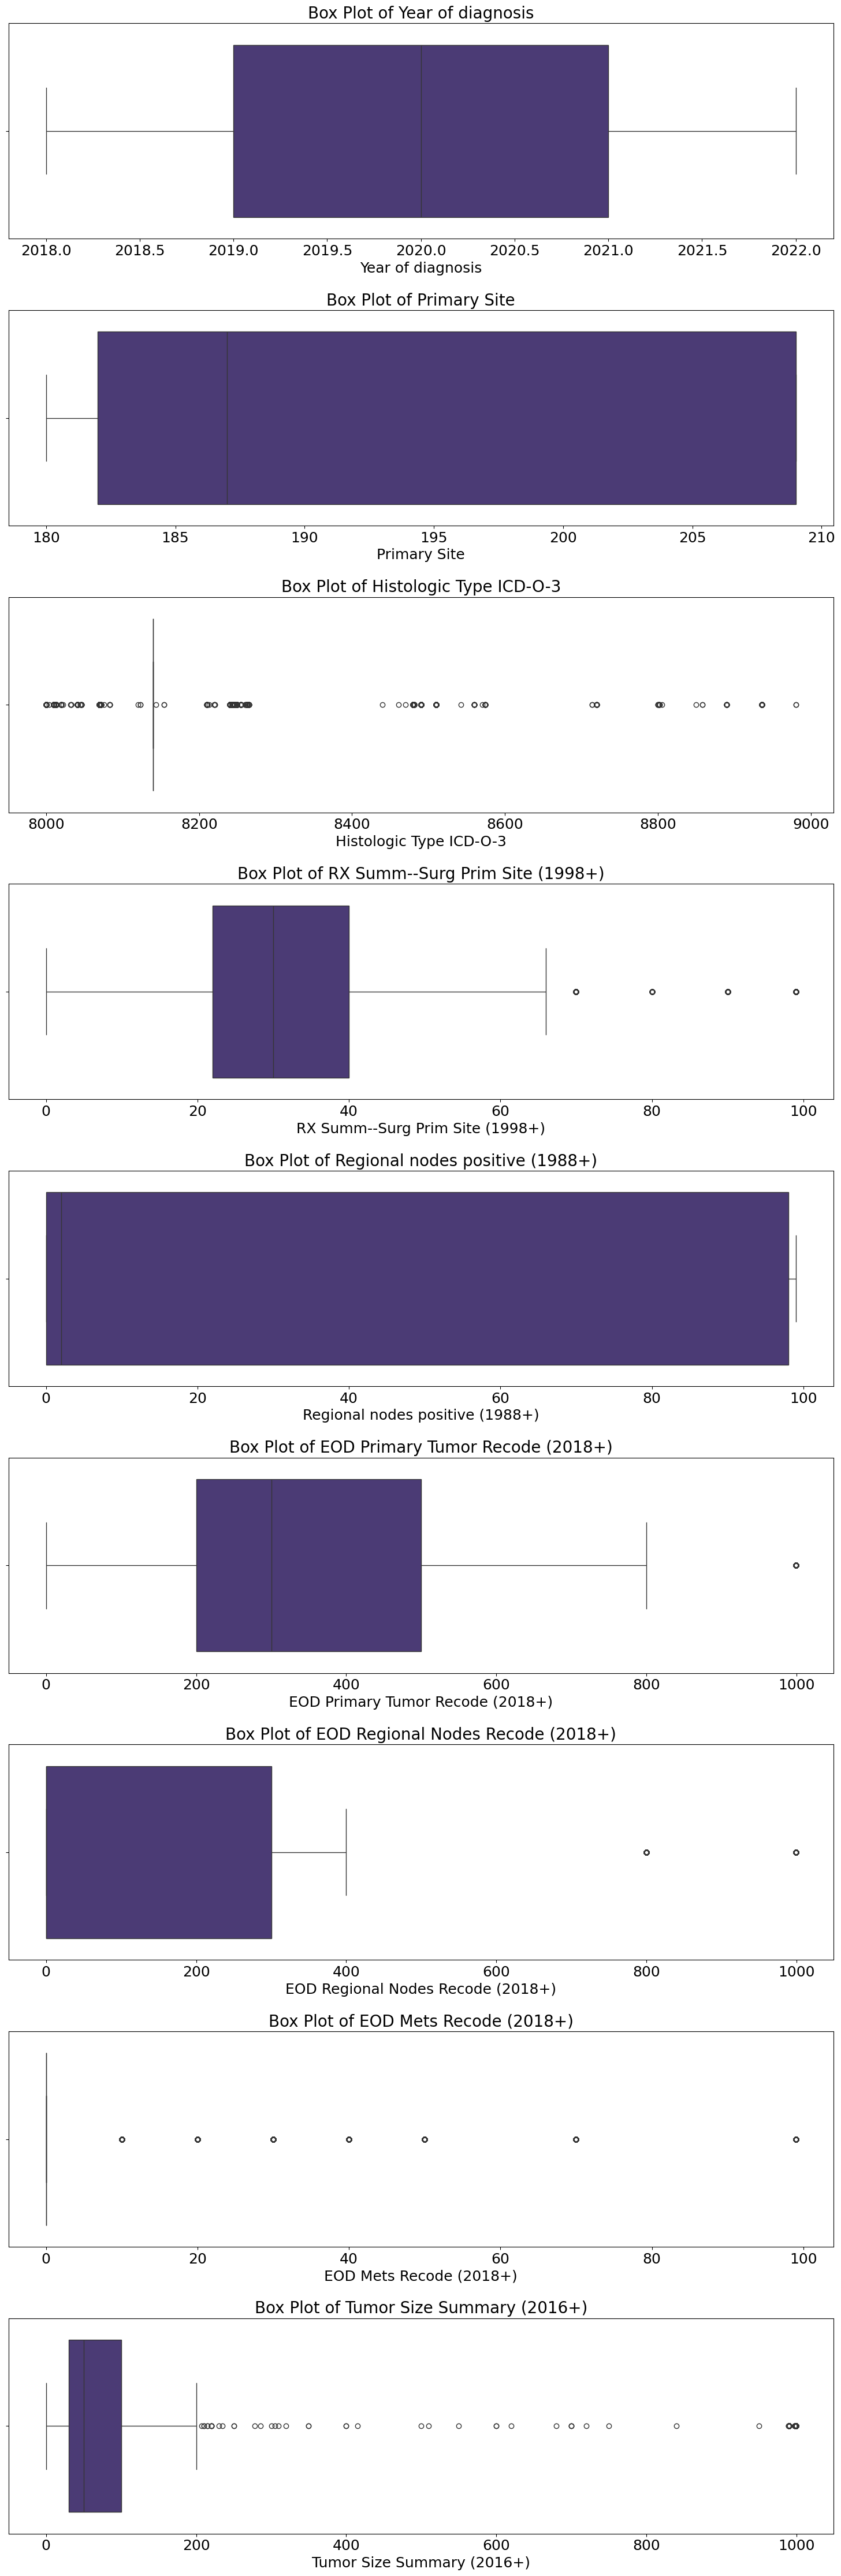

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with integer data type
int_cols = df.select_dtypes(include='int64').columns

print("Checking for outliers in integer columns:")

# Visualize outliers using box plots for integer columns
plt.figure(figsize=(15, 5 * len(int_cols)))
for i, col in enumerate(int_cols):
    plt.subplot(len(int_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54450 entries, 0 to 54484
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Age (15-90+)                                     54450 non-null  object
 1   Race recode (White, Black, Other)                54450 non-null  object
 2   Sex                                              54450 non-null  object
 3   Year of diagnosis                                54450 non-null  int64 
 4   Marital status at diagnosis                      54450 non-null  object
 5   Primary Site                                     54450 non-null  int64 
 6   Histologic Type ICD-O-3                          54450 non-null  int64 
 7   Behavior code ICD-O-3                            54450 non-null  object
 8   Diagnostic Confirmation                          54450 non-null  object
 9   Chemotherapy recode (yes, no/unk)           

In [ ]:
df['Time from diagnosis to treatment in days recode'].unique()

array(['015', '063', 'Unable to calculate', '000', '038', '042', '006',
       '068', '084', '049', '105', '062', '077', '021', '009', '043',
       '020', '041', '146', '051', '013', '033', '082', '092', '037',
       '055', '010', '028', '071', '035', '081', '007', '133', '004',
       '024', '044', '070', '048', '052', '050', '018', '195', '069',
       '111', '001', '003', '017', '047', '022', '089', '012', '170',
       '036', '058', '227', '053', '032', '034', '057', '066', '027',
       '039', '065', '030', '110', '196', '056', '026', '256', '125',
       '054', '005', '008', '040', '098', '064', '011', '060', '153',
       '019', '016', '090', '023', '031', '074', '126', '002', '116',
       '155', '075', '025', '088', '162', '045', '119', '029', '091',
       '073', '117', '086', '141', '061', '102', '112', '083', '014',
       '103', '122', '046', '059', '085', '258', '076', '104', '206',
       '259', '094', '106', '731+ days', '113', '147', '078', '301',
       '177', '151'

In [ ]:
import numpy as np
import pandas as pd

col = 'Time from diagnosis to treatment in days recode'

df[col] = df[col].replace({
    'Unable to calculate': np.nan,
    'Blank(s)': np.nan,
    '731+ days': 731
})

df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[col].describe())
print(df[col].dtype)

count    47093.000000
mean        24.473319
std         34.024577
min          0.000000
25%          0.000000
50%         16.000000
75%         37.000000
max        731.000000
Name: Time from diagnosis to treatment in days recode, dtype: float64
float64


In [ ]:
df.dropna(subset=['Time from diagnosis to treatment in days recode'], inplace=True)

df.isnull().sum()

,0
Age (15-90+),0
"Race recode (White, Black, Other)",0
Sex,0
Year of diagnosis,0
Marital status at diagnosis,0
Primary Site,0
Histologic Type ICD-O-3,0
Behavior code ICD-O-3,0
Diagnostic Confirmation,0
"Chemotherapy recode (yes, no/unk)",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47093 entries, 0 to 54483
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (15-90+)                                     47093 non-null  object 
 1   Race recode (White, Black, Other)                47093 non-null  object 
 2   Sex                                              47093 non-null  object 
 3   Year of diagnosis                                47093 non-null  int64  
 4   Marital status at diagnosis                      47093 non-null  object 
 5   Primary Site                                     47093 non-null  int64  
 6   Histologic Type ICD-O-3                          47093 non-null  int64  
 7   Behavior code ICD-O-3                            47093 non-null  object 
 8   Diagnostic Confirmation                          47093 non-null  object 
 9   Chemotherapy recode (yes, no/unk)

##Imbalance Data Check

In [ ]:
# Remove rows where the target variable is "Dead (missing/unknown COD)"
df = df[df['SEER cause-specific death classification'] != 'Dead (missing/unknown COD)'].copy()

print("Rows with 'Dead (missing/unknown COD)' in the target column removed.")
display(df['SEER cause-specific death classification'].value_counts())

Rows with 'Dead (missing/unknown COD)' in the target column removed.


,count
SEER cause-specific death classification,
Alive or dead of other cause,39179
Dead (attributable to this cancer dx),7745


Proportion of the target variable:


,proportion
SEER cause-specific death classification,
Alive or dead of other cause,0.834946
Dead (attributable to this cancer dx),0.165054


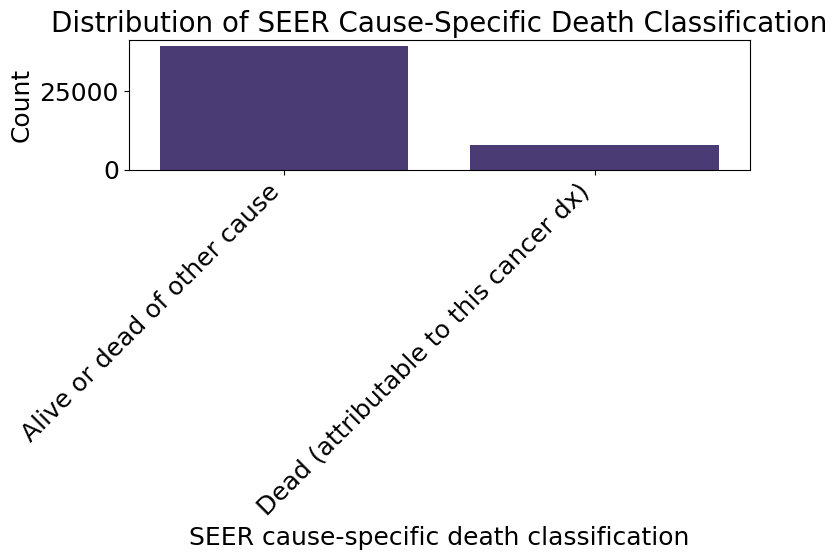

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the proportion of the target variable
target_proportions = df['SEER cause-specific death classification'].value_counts(normalize=True)
print("Proportion of the target variable:")
display(target_proportions)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SEER cause-specific death classification', data=df)
plt.title('Distribution of SEER Cause-Specific Death Classification')
plt.xlabel('SEER cause-specific death classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46924 entries, 0 to 54483
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (15-90+)                                     46924 non-null  object 
 1   Race recode (White, Black, Other)                46924 non-null  object 
 2   Sex                                              46924 non-null  object 
 3   Year of diagnosis                                46924 non-null  int64  
 4   Marital status at diagnosis                      46924 non-null  object 
 5   Primary Site                                     46924 non-null  int64  
 6   Histologic Type ICD-O-3                          46924 non-null  int64  
 7   Behavior code ICD-O-3                            46924 non-null  object 
 8   Diagnostic Confirmation                          46924 non-null  object 
 9   Chemotherapy recode (yes, no/unk)

##Label Encoding

In [ ]:
import pandas as pd

# =========================
# Mapping Label Encoding
# =========================

label_mappings = {
    'Age (15-90+)': {
        '15-19 years': 0, '20-24 years': 1, '25-29 years': 2, '30-34 years': 3,
        '35-39 years': 4, '40-44 years': 5, '45-49 years': 6, '50-54 years': 7,
        '55-59 years': 8, '60-64 years': 9, '65-69 years': 10, '70-74 years': 11,
        '75-79 years': 12, '80-84 years': 13, '85-89 years': 14, '90+ years': 15
    },

    'Race recode (White, Black, Other)': {
        'White': 0, 'Black': 1, 'Other (American Indian/AK Native, Asian/Pacific Islander)': 2, 'Unknown': 3
    },

    'Sex': {'Female': 0, 'Male': 1},

    'Marital status at diagnosis': {
        'Single (never married)': 0, 'Married (including common law)': 1,
        'Unmarried or Domestic Partner': 2, 'Divorced': 3, 'Separated': 4,
        'Widowed': 5, 'Unknown': 6
    },

    'Behavior code ICD-O-3': {'Malignant': 0},

    'Diagnostic Confirmation': {
        'Positive histology': 0, 'Positive microscopic confirm, method not specified': 1,
        'Direct visualization without microscopic confirmation': 2,
        'Positive exfoliative cytology, no positive histology': 3,
        'Positive laboratory test/marker study': 4,
        'Clinical diagnosis only': 5, 'Radiography without microscopic confirm': 6,
        'Unknown': 7
    },

    'Chemotherapy recode (yes, no/unk)': {'No/Unknown': 0, 'Yes': 1},

    'Radiation recode': {
        'None/Unknown': 0, 'Beam radiation': 1,
        'Combination of beam with implants or isotopes': 2,
        'Radioactive implants (includes brachytherapy) (1988+)': 3,
        'Radioisotopes (1988+)': 4,
        'Radiation, NOS  method or source not specified': 5,
        'Recommended, unknown if administered': 6,
        'Refused (1988+)': 7
    },

    'Derived Summary Grade 2018 (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    'RX Summ--Surg/Rad Seq': {
        'No radiation and/or no surgery; unknown if surgery and/or radiation given': 0,
        'Radiation prior to surgery': 1,
        'Radiation after surgery': 2,
        'Radiation before and after surgery': 3,
        'Intraoperative radiation': 4,
        'Intraoperative rad with other rad before/after surgery': 5,
        'Surgery both before and after radiation': 6,
        'Sequence unknown, but both were given': 7
    },

    'SEER Combined Mets at DX-bone (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},
    'SEER Combined Mets at DX-liver (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},
    'SEER Combined Mets at DX-lung (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},

    'Derived EOD 2018 T Recode (2018+)': {
        'Tis': 0, 'Tis(LAMN)': 1, 'T0': 2, 'T1': 3, 'T1a': 4, 'T1b': 5,
        'T2': 6, 'T2b': 7, 'T3': 8, 'T4': 9, 'T4a': 10, 'T4b': 11, 'TX': 12,
        '88': 13
    },

    'Derived EOD 2018 N Recode (2018+)': {
        'N0': 0, 'N1': 1, 'N1a': 2, 'N1b': 3, 'N1c': 4,
        'N2': 5, 'N2a': 6, 'N2b': 7, 'NX': 8, '88': 9
    },

    'Derived EOD 2018 M Recode (2018+)': {
        'M0': 0, 'M1': 1, 'M1a': 2, 'M1b': 3, 'M1c': 4, '88': 5
    },

    'Median household income inflation adj to 2023': {
        '< $40,000': 0, '$40,000 - $44,999': 1, '$45,000 - $49,999': 2,
        '$50,000 - $54,999': 3, '$55,000 - $59,999': 4, '$60,000 - $64,999': 5,
        '$65,000 - $69,999': 6, '$70,000 - $74,999': 7, '$75,000 - $79,999': 8,
        '$80,000 - $84,999': 9, '$85,000 - $89,999': 10, '$90,000 - $94,999': 11,
        '$95,000 - $99,999': 12, '$100,000 - $109,999': 13, '$110,000 - $119,999': 14,
        '$120,000+': 15, 'Unknown/missing/no match/Not 1990-2023': 16
    },

    'Rural-Urban Continuum Code': {
        'Counties in metropolitan areas ge 1 million pop': 0,
        'Counties in metropolitan areas of 250,000 to 1 million pop': 1,
        'Counties in metropolitan areas of lt 250 thousand pop': 2,
        'Nonmetropolitan counties adjacent to a metropolitan area': 3,
        'Nonmetropolitan counties not adjacent to a metropolitan area': 4,
        'Unknown/missing/no match/Not 1990-2023': 5
    },

    'First malignant primary indicator': {'No': 0, 'Yes': 1},

    'Derived EOD 2018 Stage Group Recode (2018+)': {
        '0': 0, '1': 1, '2': 2, '2A': 3, '2B': 4, '2C': 5,
        '3': 6, '3A': 7, '3B': 8, '3C': 9,
        '4': 10, '4A': 11, '4B': 12, '4C': 13,
        '88': 14, '99': 15
    },

    'Grade Pathological (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    'Grade Clinical (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    # ⚠️ Target Variable: Alive = 1, Dead = 0
    'SEER cause-specific death classification': {
        'Dead (attributable to this cancer dx)': 0,
        'Alive or dead of other cause': 1
    }
}

# =========================
# Apply Encoding
# =========================

for col, mapping in label_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"✅ Encoded {col}")

# Check result
df.head()

✅ Encoded Age (15-90+)
✅ Encoded Race recode (White, Black, Other)
✅ Encoded Sex
✅ Encoded Marital status at diagnosis
✅ Encoded Behavior code ICD-O-3
✅ Encoded Diagnostic Confirmation
✅ Encoded Chemotherapy recode (yes, no/unk)
✅ Encoded Radiation recode
✅ Encoded Derived Summary Grade 2018 (2018+)
✅ Encoded RX Summ--Surg/Rad Seq
✅ Encoded SEER Combined Mets at DX-bone (2010+)
✅ Encoded SEER Combined Mets at DX-liver (2010+)
✅ Encoded SEER Combined Mets at DX-lung (2010+)
✅ Encoded Derived EOD 2018 T Recode (2018+)
✅ Encoded Derived EOD 2018 N Recode (2018+)
✅ Encoded Derived EOD 2018 M Recode (2018+)
✅ Encoded Median household income inflation adj to 2023
✅ Encoded Rural-Urban Continuum Code
✅ Encoded First malignant primary indicator
✅ Encoded Derived EOD 2018 Stage Group Recode (2018+)
✅ Encoded Grade Pathological (2018+)
✅ Encoded Grade Clinical (2018+)
✅ Encoded SEER cause-specific death classification


,Age (15-90+),"Race recode (White, Black, Other)",Sex,Year of diagnosis,Marital status at diagnosis,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Diagnostic Confirmation,"Chemotherapy recode (yes, no/unk)",...,EOD Regional Nodes Recode (2018+),EOD Mets Recode (2018+),Median household income inflation adj to 2023,Rural-Urban Continuum Code,First malignant primary indicator,Derived EOD 2018 Stage Group Recode (2018+),Grade Pathological (2018+),Grade Clinical (2018+),Tumor Size Summary (2016+),SEER cause-specific death classification
0,6,2,0,2019,1,184,8140,0,0,1,...,300,0,15,0,0,8,1,4,27,1
1,12,0,1,2021,0,209,8140,0,0,0,...,800,0,15,0,0,15,4,0,40,0
4,9,0,0,2018,3,187,8140,0,0,0,...,0,0,15,0,1,1,1,4,22,1
7,9,2,0,2019,6,209,8140,0,0,1,...,0,0,15,0,0,3,1,1,28,1
8,13,0,1,2020,1,209,8140,0,0,0,...,0,0,15,0,0,1,4,1,10,1



#Train-Validation-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your target variable is 'SEER cause-specific death classification'
X = df.drop('SEER cause-specific death classification', axis=1)
y = df['SEER cause-specific death classification']

# Combine X and y to easily drop rows with NaN in either
df_combined = pd.concat([X, y], axis=1)

# Drop rows with any NaN values
df_combined.dropna(inplace=True)

# Separate X and y again
X = df_combined.drop('SEER cause-specific death classification', axis=1)
y = df_combined['SEER cause-specific death classification']

print("Rows with missing values dropped from both features and target.")
print(f"Shape after dropping NaNs: {df_combined.shape}")

# Split data into training and a temporary set (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print("\nData split into training, validation, and test sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

# Define the directory to save the files
save_dir = '/content/drive/MyDrive/Colorectal_Cancer_Survival_Data_Split/'

# Create the directory if it doesn't exist
import os
os.makedirs(save_dir, exist_ok=True)

# Save the split data to CSV files
X_train.to_csv(os.path.join(save_dir, 'X_train.csv'), index=False)
y_train.to_csv(os.path.join(save_dir, 'y_train.csv'), index=False)
X_val.to_csv(os.path.join(save_dir, 'X_val.csv'), index=False)
y_val.to_csv(os.path.join(save_dir, 'y_val.csv'), index=False)
X_test.to_csv(os.path.join(save_dir, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(save_dir, 'y_test.csv'), index=False)

print(f"\nSplit data saved to: {save_dir}")

In [ ]:
# Load the split data from CSV files
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
import os
os.makedirs(save_dir, exist_ok=True)

X_train = pd.read_csv(os.path.join(save_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(save_dir, 'y_train.csv')).squeeze() # .squeeze() to convert DataFrame to Series
X_val = pd.read_csv(os.path.join(save_dir, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(save_dir, 'y_val.csv')).squeeze()
X_test = pd.read_csv(os.path.join(save_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(save_dir, 'y_test.csv')).squeeze()

print("Split data loaded successfully from Google Drive.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Split data loaded successfully from Google Drive.
Training set shape: (32846, 32), (32846,)
Validation set shape: (4692, 32), (4692,)
Test set shape: (9386, 32), (9386,)
